In [6]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO
import seaborn as sns
sns.set()

In [7]:
# Crear conjunto de datos
n = 100
xPlot = [(float(i)/float(n)-0.5) for i in range(n+1)]

#x debe ser una lista de listas
x=[[s] for s in xPlot]

# Asignar valores de y
y = [i + np.random.normal(scale=0.1) for i in xPlot]

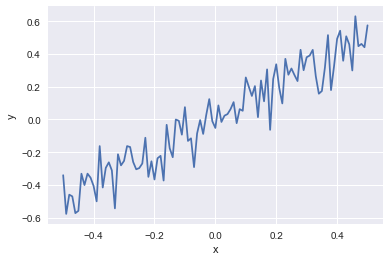

In [8]:
# Visualizar los datos

plt.plot(x,y)
plt.axis("tight")
plt.xlabel("x")
plt.ylabel("y");

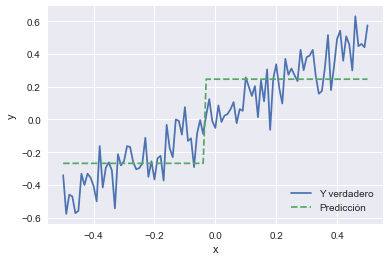

In [9]:
simpleTree = DecisionTreeRegressor(max_depth=1)
simpleTree.fit(x,y)

with open("simpleTree.dot","w") as f:
    f = tree.export_graphviz(simpleTree, out_file=f)
    
# Comparar los valores pronosticados con los valores reales
yHat = simpleTree.predict(x)

plt.figure()
plt.plot(xPlot,y,label = "Y verdadero")
plt.plot(xPlot,yHat, label = "Predicción", linestyle="--")
plt.legend(bbox_to_anchor=(1,0.2))
plt.axis("tight")
plt.xlabel("x")
plt.ylabel("y");

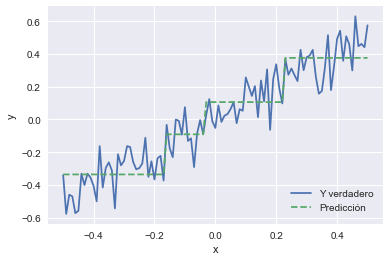

In [10]:
simpleTree2 = DecisionTreeRegressor(max_depth=2)
simpleTree2.fit(x,y)

# Comparar los valores pronosticados con los valores reales
yHat = simpleTree2.predict(x)

plt.figure()
plt.plot(xPlot,y,label = "Y verdadero")
plt.plot(xPlot,yHat, label = "Predicción", linestyle="--")
plt.legend(bbox_to_anchor=(1,0.2))
plt.axis("tight")
plt.xlabel("x")
plt.ylabel("y");

-0.010000000000000009


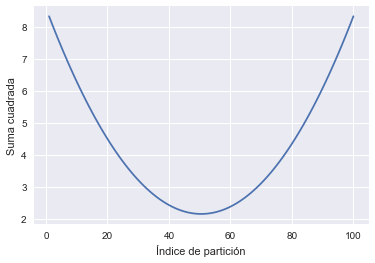

In [11]:
# Prueba de múltiples valores de partición hasta encontrar el mejor
sse = []
xMin = []

for i in range(1,len(xPlot)):
    # Dividir la lista en puntos de izquierda a derecha del punto de partición
    lhList = list(xPlot[0:i]) # Va añadiendo hacia la izquierda
    rhList = list(xPlot[i:len(xPlot)]) # Va removiendo hacia la derecha
    
    # Cálculo de lo promedios de cada lado
    lhAvg = sum(lhList)/len(lhList)
    rhAvg = sum(rhList)/len(rhList)
    
    #Cálculo de la suma cuadrado del error en la izq, der y total
    lhSse = sum([(s-lhAvg)*(s-lhAvg) for s in lhList])
    rhSse = sum([(s-rhAvg)*(s-rhAvg) for s in rhList])
    
    #Sumar izq y der
    sse.append(lhSse + rhSse)
    xMin.append(max(lhList))

plt.plot(range(1, len(xPlot)),sse)
plt.xlabel("Índice de partición")
plt.ylabel("Suma cuadrada")

minSse = min(sse)
idxMin = sse.index(minSse)
print(xMin[idxMin])

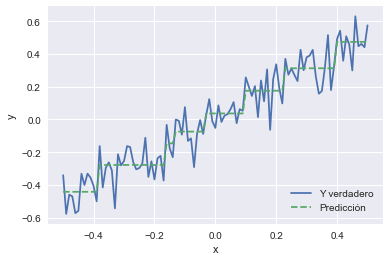

In [12]:
simpleTree3 = DecisionTreeRegressor(max_depth=3)
simpleTree3.fit(x,y)

yHat = simpleTree3.predict(x)

plt.figure()
plt.plot(xPlot,y,label = "Y verdadero")
plt.plot(xPlot,yHat, label = "Predicción", linestyle="--")
plt.legend(bbox_to_anchor=(1,0.2))
plt.axis("tight")
plt.xlabel("x")
plt.ylabel("y");

## Diagnóstico de sobreaprendizaje

In [13]:
n = 100
np.random.seed(1)

xPlot = [(float(i)/float(n) - 0.5) for i in range(n+1)]
x = [[s] for s in xPlot]
y = [s + np.random.normal(scale=0.1) for s in xPlot]

nrow = len(x)

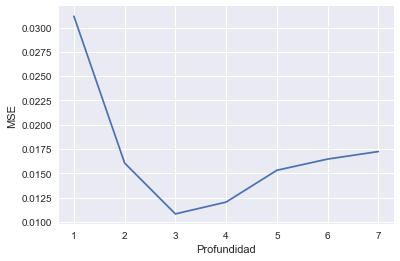

In [14]:
# Se va a ajustar el árbol con diferentes valores de profundidad

depthList = [1,2,3,4,5,6,7]
xvalMSE = []
nxval = 10

for iDepth in depthList:
    #Construcción del bucle para validación cruzada
    for ixval in range(nxval):
        
        # Definir los índices de entrenamiento y prueba
        idxTest = [a for a in range(nrow) if a%nxval == ixval%nxval]
        idxTrain = [a for a in range(nrow) if a%nxval != ixval%nxval]
        
        # Definir los conjuntos
        xTrain = [x[r] for r in idxTrain]
        xTest = [x[r] for r in idxTest]
        yTrain = [y[r] for r in idxTrain]
        yTest = [y[r] for r in idxTest]
        
        # Entrenar el árbol con las diferentes pofundidades
        treeModel = DecisionTreeRegressor(max_depth=iDepth)
        treeModel.fit(xTrain,yTrain)
        
        treePrediction = treeModel.predict(xTest)
        error = [yTest[r] - treePrediction[r] for r in range(len(yTest))]
        
        # Error acumulado
        if ixval == 0:
            ossErrors = sum([e * e for e in error])
        else: 
            ossErrors += sum([e * e for e in error])
        
    mse = ossErrors/nrow
    xvalMSE.append(mse)

plt.plot(depthList,xvalMSE)
plt.axis("tight")
plt.xlabel("Profundidad")
plt.ylabel("MSE");

La mejor profundidad es de 3 y permite minimizar el MSE